In [2]:
# importing the required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from time import perf_counter 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
import cv2
import numpy as np

In [3]:
# Defining the paths to the data folders
train_dir = '../data/train'
test_dir = '../data/test'
valid_dir = '../data/valid'

In [4]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the train data
train_data = datagen.flow_from_directory(train_dir, 
                                         target_size=(224, 224), # Adjust to your image size
                                         class_mode='categorical')

# Load the validation data
valid_data = datagen.flow_from_directory(valid_dir, 
                                         target_size=(224, 224), 
                                         class_mode='categorical')

# Load the test data
test_data = datagen.flow_from_directory(test_dir, 
                                        target_size=(224, 224), 
                                        class_mode='categorical', 
                                        shuffle=False)  # No need to shuffle test data

Found 955 images belonging to 12 classes.
Found 35 images belonging to 12 classes.
Found 38 images belonging to 12 classes.


In [6]:
from keras.layers import Input

In [7]:
model = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=12,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,711,180 (98.08 MB)

 Trainable params: 25,711,180 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
epochs = 25
accuracy_metrics = model.fit(x=train_data,epochs=epochs,validation_data=valid_data)

Epoch 1/25


c:\Users\admin\dataScienceBootcamp\my_eda_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1122 - loss: 6.5993 - val_accuracy: 0.2286 - val_loss: 2.3426
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5241 - loss: 1.5974 - val_accuracy: 0.1714 - val_loss: 2.5254
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8572 - loss: 0.4965 - val_accuracy: 0.2571 - val_loss: 2.9329
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8936 - loss: 0.3391 - val_accuracy: 0.2857 - val_loss: 3.2797
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9570 - loss: 0.1421 - val_accuracy: 0.2857 - val_loss: 3.3458
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9759 - loss: 0.1075 - val_accuracy: 0.2857 - val_loss: 2.8532
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9933 - loss: 0.0298 - val_accuracy: 0.2857 - val_loss: 3.5008
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.3143 - val_loss: 3.4038
Epo

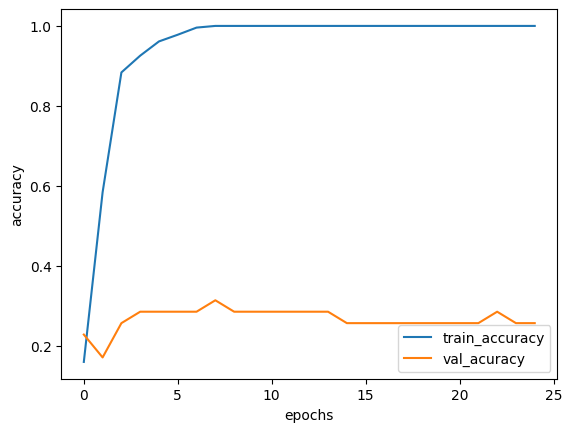

In [11]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [12]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 25th epoch the validation accuracy has reached 0.2571


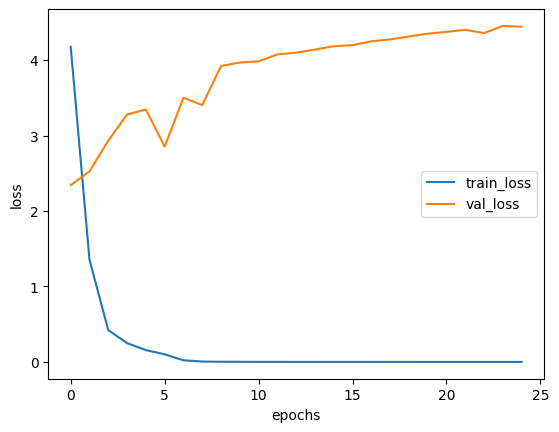

In [13]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [14]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 25th epoch the validation loss has decreased to 4.4418
